# Bonusaufgaben (10 + 10 = 20 Punkte) 
## Abgabe in der Woche 14.-18. Januar

In [1]:
import numpy as np
from imageio import * 
import matplotlib.pyplot as plt
import scipy 

## Bonusaufgabe 1: Veranschaulichung der Singulärwertzerlegung (10 Punkte)

_Vorbemerkung:_ Die hier gezeigte Technik wird in der Praxis __nicht__ für die Kompression von Bildern eingesetzt. Die Aufgabe soll lediglich die Approximationseigenschaften der Singulärwertzerlegung anschaulich darstellen. 

Unter Benutzung der Bibliothek _imageio_ können in Python Bilder als numpy-array importiert bzw. angezeigt werden. Kopieren Sie beispielsweise unser Beispielbild ("Bonusaufgabe1_beispiel.jpg") in Ihr Homeverzeichnis und führen Sie die folgenden Zeilen aus: 

Das Bild (in Graustufen) wird als zweidimensionales array mit ganzzahligen Einträgen von 0 bis 255 importiert. Die Einträge des Arrays codieren die Helligkeit der jeweiligen Pixel. Wir normieren die Einträge auf das Intervall $[0,1]$ und lassen anschließend das Bild anzeigen.

(772, 556) 556 (556, 2000)
99.86% des ori. Speicher wird benötigt
9.609304353749934


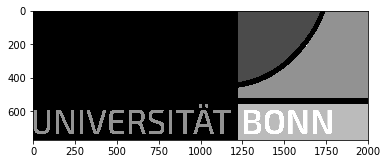

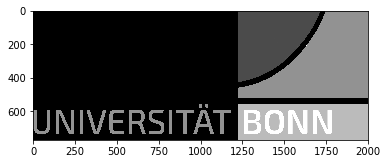

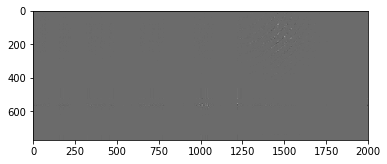

In [112]:
## Quelle der ursprünglichen Version des Beispielbildes: https://upload.wikimedia.org/wikipedia/commons/7/72/Universität_Bonn.svg
## Diese ursprüngliche Version des Bildes wurde in Graustufen und das jpg-Format konvertiert. 

def diag(arr, n, m):
    A = np.zeros((n,m))
    for i in range(len(arr)):
        A[i][i] = arr[i]
    return A

A = imread("C:/Users/roman/Desktop/Numerik-101/Bonusaufgabe1_beispiel.jpg")
#A = imread("C:/Users/roman/Desktop/Numerik-101/lena1.tif")
A = A/255
#plt.figure()
#plt.gray()
#plt.imshow(A)

u, s, vh = np.linalg.svd(A)

hoch = u.shape[0]
breit = vh.shape[1]

compres = -740
#k = 128 #100% lena
k =556 #100% logo
#k = 32
vh2 = vh[:k,:]
u2 = u[:,:k]

#B = u @ diag(s[:-740],hoch,breit) @ vh
B = u2 @ np.diag(s[:k]) @ vh2
print(u2.shape, k, vh2.shape)

plt.figure()
plt.gray()
plt.imshow(A)
plt.close

plt.figure()
plt.gray()
plt.imshow(B)
plt.close

plt.figure()
plt.gray()
plt.imshow(A-B)
plt.close

print("{0:.2%} des ori. Speicher wird benötigt".format((hoch*k+k+k*breit)/(hoch*breit)))
#print(((hoch*k+k+k*breit)/(hoch*breit)))
print(np.sum(np.abs(A-B)))




Sei nun $A$ die oben durch das Bild gegebene Matrix. Führen Sie die (in numpy/scipy vorimplementierte) Singulärwertzerlegung für $A$ aus. Plotten Sie die Singulärwerte und die zu den Matrizen $A_k$ gehörigen Bilder, wobei $A_k$ durch das Abschneiden der Singulärwertzerlegung nach $k$ Singulärwerten entsteht, vgl. Aufgabe 3a) von Blatt 10. Geben Sie jeweils den (relativen) Fehler $\lVert A - A_k \rVert_F / \lVert A \rVert_F$ bzgl. der Frobeniusnorm an. Geben Sie ferner an, wie viel Prozent des zur Speicherung von $A$ nötigen Speichers noch benötigt wird, um $A_k$ geschickt zu speichern, vgl. Aufgabe 3b) von Blatt 10. 

Wiederholen Sie dies für eine aussagekräftige Wahl von verschiedenen $k$'s und interpretieren Sie Ihre Ergebnisse. 

## Bonusaufgabe 2: Perron-Cluster Cluster Analysis (10 Punkte)

Erzeugen Sie eine Blockdiagonalmatrix $A$ mit Diagonalblöcken $A_l \in \mathbb{R}^{n_l \times n_l}$, $n_1 = 10$, $n_2 = 20$, $n_3 = 30$, deren Einträge zufällig in $[0,1]$ gewählt sind. Normieren Sie anschließend die Zeilen von $A$ derart, dass $A$ eine stochastische Matrix ist. 

Berechnen Sie nun mit Hilfe einer geeigneten scipy/numpy-Routine ein System von Eigenvektoren zum Perron-Eigenwert 1 von $A$. Plotten Sie diese berechneten Eigenvektoren. Können Sie die zu den Blöcken gehörigen Indexmengen ("Cluster") aus dem Plot ablesen?

Bilden Sie nun die Matrix $\tilde{A} = (1-\epsilon)A + \epsilon E$ mit $\epsilon > 0$ wobei $E \in \mathbb{R}^{60 \times 60}$ eine stochastische Matrix mit zufälligen Einträgen ist. Berechnen Sie nun die Eigenwerte der gestörten Matrix $\tilde{A}$ und plotten Sie die Eigenvektoren zu denjenigen Eigenwerten, die in einer $\delta$-Umgebung von 1 liegen. 

Variieren Sie $\epsilon$ und versuchen Sie dabei $\delta$ so anzupassen, dass Sie aus dem Plot der Eigenvektoren noch Clusten ablesen können. 